# decode from  a score file

* https://github.com/tensorflow/tensor2tensor/blob/master/tensor2tensor/bin/t2t_decoder.py

In [20]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

# Dependency imports

from tensor2tensor.bin import t2t_trainer
from tensor2tensor.data_generators import text_encoder
from tensor2tensor.utils import decoding
from tensor2tensor.utils import registry
from tensor2tensor.utils import trainer_lib
from tensor2tensor.utils import usr_dir

import tensorflow as tf

sys.path.append("../tfti")
import tfti

In [56]:
# Command line flags.

FLAGS = tf.contrib.training.HParams()

FLAGS.problem = "genomics_binding_deepsea_gm12878"
FLAGS.model = "tfti_transformer"
FLAGS.hparams_set = "tfti_transformer_base"
FLAGS.hparams = ""
FLAGS.data_dir = "../tfti/dev"

# Checkpoint to use.
FLAGS.checkpoint_path = os.path.expanduser("~/Downloads/6-64-25/model.ckpt-210001")

# Decode from and to.
FLAGS.decode_from_file = None
FLAGS.decode_to_file = "../tfti/dev/decode_to_file.txt"
FLAGS.score_file = "../tfti/dev/score_file.txt"

# Unused.
FLAGS.keep_timestamp = False
FLAGS.decode_interactive = False
FLAGS.decode_shards = 1
FLAGS.decode_hparams = ""
FLAGS.worker_id = 0

FLAGS.__dict__

{'_hparam_types': {},
 '_model_structure': None,
 'checkpoint_path': '/Users/alexyku/Downloads/6-64-25/model.ckpt-210001',
 'data_dir': '../tfti/dev',
 'decode_from_file': None,
 'decode_hparams': '',
 'decode_interactive': False,
 'decode_shards': 1,
 'decode_to_file': '../tfti/dev/decode_to_file.txt',
 'hparams': '',
 'hparams_set': 'tfti_transformer_base',
 'keep_timestamp': False,
 'model': 'tfti_transformer',
 'problem': 'genomics_binding_deepsea_gm12878',
 'score_file': '../tfti/dev/score_file.txt',
 'worker_id': 0}

In [ ]:
def create_hparams():
    return trainer_lib.create_hparams(
      FLAGS.hparams_set,
      FLAGS.hparams,
      data_dir=os.path.expanduser(FLAGS.data_dir),
      problem_name=FLAGS.problem)

In [33]:
hparams = create_hparams()
problem = registry.problem(FLAGS.problem)
encoders = problem.get_feature_encoders(FLAGS.data_dir)

assert isinstance(problem, tfti.TftiDeepseaProblem)

In [34]:
inputs_ph = tf.placeholder(dtype=tf.int32)
inputs_reshaped = tf.reshape(inputs_ph, shape=[problem.input_sequence_length])
targets_ph = tf.placeholder(dtype=tf.int32)
targets_reshaped = tf.reshape(targets_ph, shape=[problem.num_binary_predictions])

In [ ]:
# Define custom mask.
latent_keep_mask = tf.zeros(problem.num_binary_predictions)
latent_keep_mask = tf.cast(latent_keep_mask, tf.bool)

In [36]:
features = {
  "inputs": inputs_reshaped,
  "targets": targets_reshaped,
  "latent_keep_mask": latent_keep_mask,
}

features = problem.preprocess_example(features, tf.estimator.ModeKeys.EVAL, hparams)
features["target_space_id"] = tf.constant(0)

for k in ["inputs", "targets", "latents", "metrics_weights"]:
    features[k] =  tf.expand_dims(features[k], axis=0)

INFO:tensorflow:Generating latents with a `latent_keep_mask`.


[2018-04-30 21:45:26,293] Generating latents with a `latent_keep_mask`.


INFO:tensorflow:Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12878|c-Myc|

[2018-04-30 21:45:26,323] Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12

In [39]:
model = registry.model(FLAGS.model)(hparams, tf.estimator.ModeKeys.EVAL)
logits, losses = model(features)

INFO:tensorflow:Unsetting shared_embedding_and_softmax_weights.


[2018-04-30 21:46:10,547] Unsetting shared_embedding_and_softmax_weights.


INFO:tensorflow:Setting T2TModel mode to 'eval'


[2018-04-30 21:46:10,550] Setting T2TModel mode to 'eval'


INFO:tensorflow:Setting hparams.dropout to 0.0


[2018-04-30 21:46:10,554] Setting hparams.dropout to 0.0


INFO:tensorflow:Setting hparams.layer_prepostprocess_dropout to 0.0


[2018-04-30 21:46:10,556] Setting hparams.layer_prepostprocess_dropout to 0.0


INFO:tensorflow:Setting hparams.symbol_dropout to 0.0


[2018-04-30 21:46:10,560] Setting hparams.symbol_dropout to 0.0


INFO:tensorflow:Setting hparams.attention_dropout to 0.0


[2018-04-30 21:46:10,563] Setting hparams.attention_dropout to 0.0


INFO:tensorflow:Setting hparams.relu_dropout to 0.0


[2018-04-30 21:46:10,565] Setting hparams.relu_dropout to 0.0


INFO:tensorflow:Using variable initializer: uniform_unit_scaling


[2018-04-30 21:46:10,570] Using variable initializer: uniform_unit_scaling


INFO:tensorflow:Transforming feature 'inputs' with symbol_modality_782_512.bottom


[2018-04-30 21:46:10,643] Transforming feature 'inputs' with symbol_modality_782_512.bottom


INFO:tensorflow:Transforming feature 'latents' with binary_imputation_class_label_modality_512.bottom


[2018-04-30 21:46:10,869] Transforming feature 'latents' with binary_imputation_class_label_modality_512.bottom


INFO:tensorflow:Transforming 'targets' with binary_class_label_modality_512.targets_bottom


[2018-04-30 21:46:10,921] Transforming 'targets' with binary_class_label_modality_512.targets_bottom


INFO:tensorflow:Building model body


[2018-04-30 21:46:10,964] Building model body


Instructions for updating:
keep_dims is deprecated, use keepdims instead


[2018-04-30 21:46:11,271] From /Users/alexyku/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensor2tensor/layers/common_layers.py:553: calling reduce_mean (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


INFO:tensorflow:Transforming body output with binary_class_label_modality_512.top


[2018-04-30 21:46:17,175] Transforming body output with binary_class_label_modality_512.top


In [41]:
all_variables = tf.contrib.slim.get_variables_to_restore()

variables_to_restore = [v for v in all_variables if "global_step" not in v.name]
global_step_init = [v.initializer for v in all_variables if "global_step" in v.name]

saver = tf.train.Saver(variables_to_restore)
sess = tf.InteractiveSession()

sess.run(global_step_init)
saver.restore(sess, FLAGS.checkpoint_path)

INFO:tensorflow:Restoring parameters from /Users/alexyku/Downloads/6-64-25/model.ckpt-210001


[2018-04-30 21:48:39,712] Restoring parameters from /Users/alexyku/Downloads/6-64-25/model.ckpt-210001


In [79]:
# Run on each line.
results = []

for line in open(FLAGS.score_file):
    
    tab_split = line.split("\t")
    if len(tab_split) != 2:
        raise ValueError("Each line must have exactly one tab separator.")
    
    targets = tab_split[1].strip()
    inputs = tab_split[0].strip()
    
    # Run encoders.
    targets_numpy = encoders["targets"].encode(targets)
    inputs_numpy = encoders["inputs"].encode(inputs)
    
    # Prepare the fetch.
    fetch = {
        "logits": logits,
        "labels": features["targets"],
        "loss": losses["training"]
    }
    
    # Prepare the feed.
    feed = {
        inputs_ph: inputs_numpy,
        targets_ph: targets_numpy
    }
    # Get the score.
    result = sess.run(fetch, feed)
    results.append(result)
    

# Write to file.
write_file = open(os.path.expanduser(FLAGS.decode_to_file), "w")

for result in results:
    labels_str = ",".join(result["labels"].flatten().astype(str))
    logits_str = ",".join(result["logits"].flatten().astype(str))
    line = labels_str + "\t" + logits_str + "\n"
    write_file.write(line)

write_file.close()

# Sanity check.
print(f"cat {FLAGS.score_file}\n")
!cat {FLAGS.score_file}
print("\n")

print(f"cat {FLAGS.decode_to_file}\n")
!cat {FLAGS.decode_to_file} 
print("\n")

cat ../tfti/dev/score_file.txt

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTTGAATTTGAATTTGAATTTGAATTTGAATTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTTGAATTTGAATTTGAAATTTGAAATTTGAATTTGAATTTGAATTTGAATTTGAATTTTAATTTTAATTTTAATTTTAATTTTAATTTTAATTTGAATTTTGAATTTGAATTTGAATTTGATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTTGAATTTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTGAATTTTGAATTTGAATTTGAATTTGAATTTGTCTCCGATTTGTACTTCCTTTCTTTCTTTCCCGTGCATTGCACCACAATGCGCTGTTCTTGGTACACGATTATTCAAAGTGCGCTACACCATAATCTACT

# decode from a generator

In [81]:
FLAGS.tmp_dir = os.path.expanduser("~/Desktop/tmp/")
# problem.maybe_download_and_unzip(FLAGS.tmp_dir)
generator = problem.generator(FLAGS.tmp_dir, is_training=False)

In [104]:
# Run on each line.
results = []

for i in range(100):
    
    if i % 10 == 0:
        print(f"Predicting example {i}.")
    
    example = next(generator)
    inputs_numpy = example["inputs"]
    targets_numpy = example["targets"]
    
    # Prepare the fetch.
    fetch = {
        "logits": logits,
        "labels": features["targets"],
        "loss": losses["training"]
    }
    
    # Prepare the feed.
    feed = {
        inputs_ph: inputs_numpy,
        targets_ph: targets_numpy
    }
    # Get the score.
    result = sess.run(fetch, feed)
    results.append(result)
    

Predicting example 0.
Predicting example 10.
Predicting example 20.
Predicting example 30.
Predicting example 40.
Predicting example 50.
Predicting example 60.
Predicting example 70.
Predicting example 80.
Predicting example 90.


In [139]:
import numpy as np
%pylab inline

num_samples = len(results)

labels_numpy = np.stack([x["labels"] for x in results])
labels_numpy = labels_numpy.reshape([num_samples, -1])
logits_numpy = np.stack([x["logits"] for x in results])
logits_numpy = logits_numpy.reshape([num_samples, -1])

print(labels_numpy.shape)
print(logits_numpy.shape)

Populating the interactive namespace from numpy and matplotlib
(100, 35)
(100, 35)


In [142]:
from sklearn.metrics import roc_curve, auc

n_classes = labels_numpy.shape[1]

y_test = labels_numpy
y_score = logits_numpy

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/Users/alexyku/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


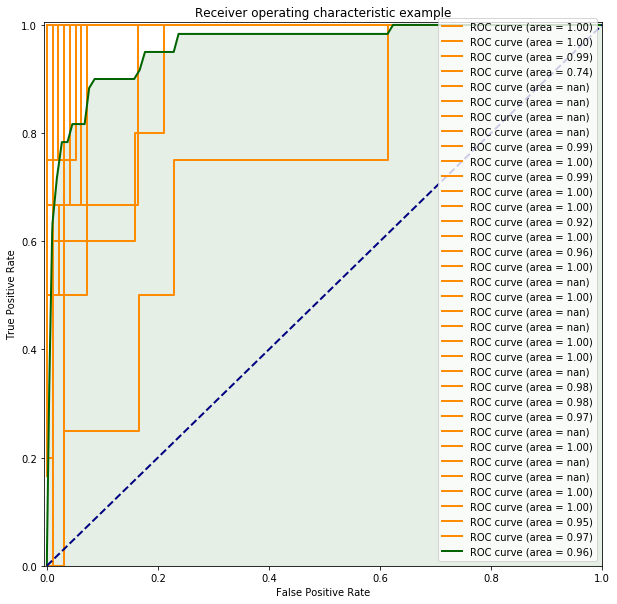

In [164]:
plt.figure(figsize=(10, 10))
lw = 2

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

# Plot micro-average ROC curve and ROC area
plt.plot(fpr["micro"], tpr["micro"], color='darkgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.fill_between(fpr["micro"], tpr["micro"], color='darkgreen', alpha=0.1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()